# Importing relevant modules and data

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data quality and relevancy 

## Train Data

In [47]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


There are quite a few individual values missing in the dataset, most of which stem from the Cabin column. With only 891 rows, 687 is far too high to be missing. To make any changes in filling the gaps would be pointless as there isn't enough really to go on. The Age and Embarked columns are a lot more plausible.

### Cabin data

In [6]:
missingcabin = 687/891*100
print(f'The percentage of missing cabin data is {missingcabin}%')

The percentage of missing cabin data is 77.10437710437711%


With over 77% of the data missing, making any kind of educated guesses wouldn't be the wise move. This column will have to be removed from the dataset.

### Age data

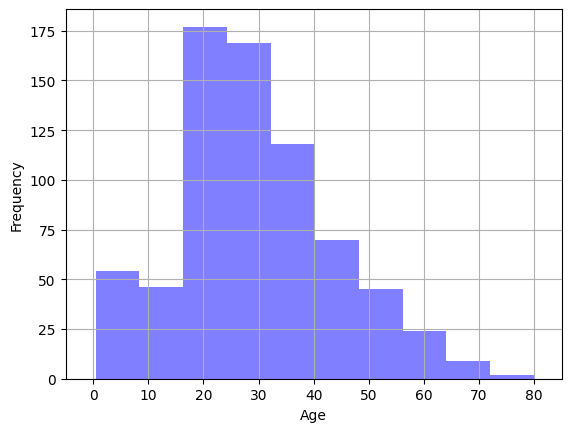

In [7]:
train_data['Age'].hist(color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(-5,85)
plt.show()

The ages are quite skewed, making the mean an ineffective measure because it will lead to bias in the data. We can try a different measure.

In [8]:
print(train_data['Age'].mean())
print(train_data['Age'].median())

29.69911764705882
28.0


The median would be a nicer use to fill in the gaps in the dataset. Unfortunately there are simply too many null values to go ahead and delete those rows, so they must be filled instead.

### Embarked data

There are 2 missing values

In [9]:
print(train_data['Embarked'].value_counts())
print()
print(train_data['Embarked'].mode())


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

0    S
Name: Embarked, dtype: object


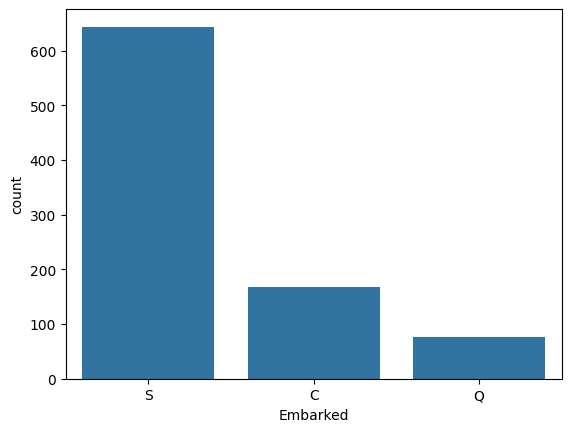

In [10]:
sns.countplot(x='Embarked', data=train_data)
plt.show()

We can use the most appearing value to fill the two gaps in the Embarked section because there are only two values missing, and these are non-numerical.

## Wrapping up the Train Data findings

In [11]:
## we need a new dataset to store the changes, and this will be what we use moving forward
new_train = train_data.copy()
new_train.drop(labels='Cabin', axis=1, inplace=True)
new_train['Age'].fillna(train_data['Age'].median(), inplace=True)
new_train['Embarked'].fillna('S', inplace=True)
new_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [12]:
new_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Transforming categorical data

Some of the columns (e.g. Sex and Embarked) are a non numerical but could also be very useful in this prediction and therefor can't simply be ignored. In order to use them however, they must be converted into numerical, usable data.

In [13]:
newer_train = pd.get_dummies(new_train, columns=['Pclass', 'Embarked', 'Sex'])
newer_train = newer_train*1 ## to convert it to integers as opposed to boolean values

There are some columns we now no longer need

In [14]:
newer_train.drop(columns=['Sex_male', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
newer_train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0


## Test Data

In [15]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are many missing values in the cabin and age columns here as well. We will carry out the same changes for these, in using the median value for the Age and dropping the Cabin column. <br><br> However there is also a missing value in the Fare column. That will be sorted out accordingly.

### Fare data

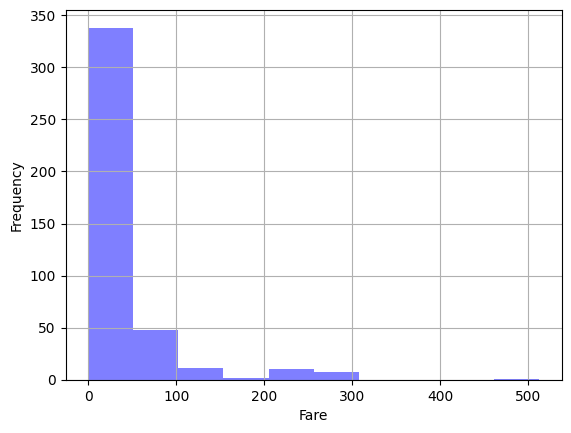

In [16]:
test_data['Fare'].hist(color='blue', alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

This graph shows a very heavy skew, again making the mean an inappropriate measure to fill the gap. Although it is only one value, it is best to keep the data as clean as possible.  

In [17]:
print(test_data['Fare'].mean())
print(test_data['Fare'].median())

35.627188489208635
14.4542


The median becomes a much better use as it doesn't take into account the outliers which are very clearly visibile in the graph

### Cabin data

In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Of the 418 entries, only 91 are not null in the Cabin column. Therefore it would be okay to drop this column here too.

### Age data

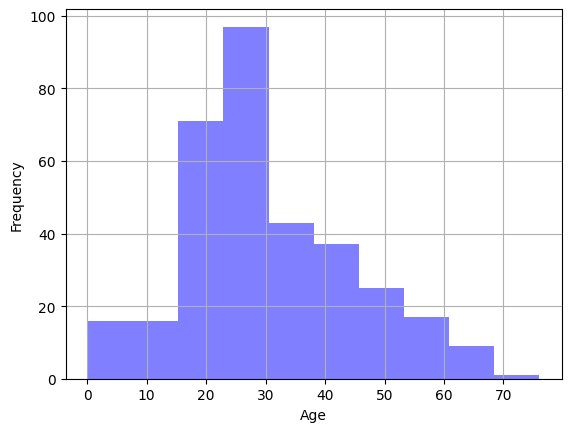

In [19]:
test_data['Age'].hist(color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Again, the values are skewed and the mean just therefore would not very a good visual representation.

## Wrapping up Test Data findings

In [20]:
new_test = test_data.copy()
new_test['Age'].fillna(test_data['Age'].median(), inplace=True)
new_test['Fare'].fillna(test_data['Fare'].median(), inplace=True)
new_test.drop('Cabin', axis=1, inplace=True)
new_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


### Transforimg categorical data (test)

In [21]:
newer_test = pd.get_dummies(new_test, columns=['Pclass', 'Embarked', 'Sex'])
newer_test.drop(columns=['Sex_male', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
newer_test *= 1
newer_test

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female
0,34.5,0,0,7.8292,0,0,1,0,1,0,0
1,47.0,1,0,7.0000,0,0,1,0,0,1,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,0
3,27.0,0,0,8.6625,0,0,1,0,0,1,0
4,22.0,1,1,12.2875,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
413,27.0,0,0,8.0500,0,0,1,0,0,1,0
414,39.0,0,0,108.9000,1,0,0,1,0,0,1
415,38.5,0,0,7.2500,0,0,1,0,0,1,0
416,27.0,0,0,8.0500,0,0,1,0,0,1,0


Now the data has been cleaned to a degree, and we can start working with it, with the intention to come back to make some extra changes if need be.

In [22]:
test_data.insert(1, 'Survived', gender_submission['Survived'])

# Exploratory Data Analysis

How does each category affect the passengers' survival rate?

In [23]:
newer_train

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,0,0,1,0
887,1,19.0,0,0,30.0000,1,0,0,0,0,1,1
888,0,28.0,1,2,23.4500,0,0,1,0,0,1,1
889,1,26.0,0,0,30.0000,1,0,0,1,0,0,0


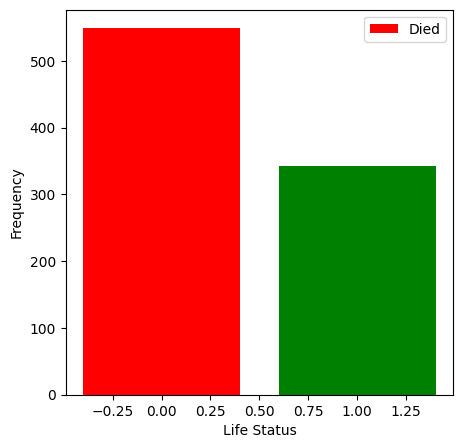

In [30]:
plt.figure(figsize=(5,5))
plt.bar(list(newer_train['Survived'].value_counts().keys()), list(newer_train['Survived'].value_counts()),color=['r','g'])
plt.ylabel('Frequency')
plt.xlabel('Life Status')
plt.legend(['Died', 'Survived'])
plt.show()

There were quite a few more passengers who died rather than survived.

We can compare age against survival.

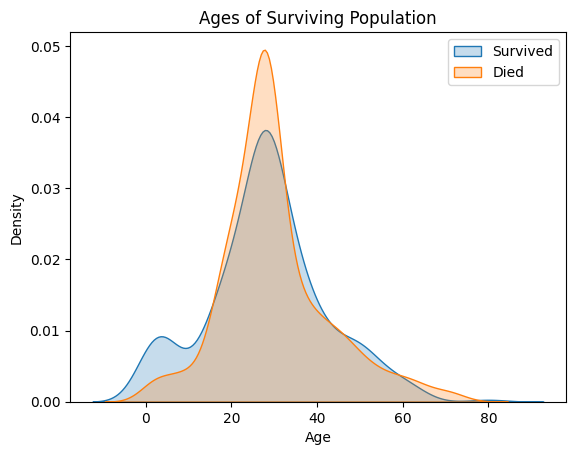

In [25]:
sns.kdeplot(newer_train['Age'][newer_train.Survived == 1], fill=True)
sns.kdeplot(newer_train['Age'][newer_train.Survived == 0], fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Ages of Surviving Population')
plt.xlabel('Age')
plt.show()

# Logistic Regression

In [43]:
corr_mat = newer_train.corr()
corr_mat

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female
Survived,1.000000,-0.064910,-0.035322,0.081629,0.257307,0.285904,0.093349,-0.322308,0.168240,0.003650,-0.149683,0.543351
Age,-0.064910,1.000000,-0.233296,-0.172482,0.096688,0.323896,0.015831,-0.291955,0.030248,-0.031415,-0.006729,-0.081163
SibSp,-0.035322,-0.233296,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.092548,-0.059528,-0.026354,0.068734,0.114631
Parch,0.081629,-0.172482,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.015790,-0.011069,-0.081228,0.060814,0.245489
Fare,0.257307,0.096688,0.159651,0.216225,1.000000,0.591711,-0.118557,-0.413333,0.269335,-0.117216,-0.162184,0.182333
Pclass_1,0.285904,0.323896,-0.054582,-0.017633,0.591711,1.000000,-0.288585,-0.626738,0.296423,-0.155342,-0.161921,0.098013
Pclass_2,0.093349,0.015831,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,-0.565210,-0.125416,-0.127301,0.189980,0.064746
Pclass_3,-0.322308,-0.291955,0.092548,0.015790,-0.413333,-0.626738,-0.565210,1.000000,-0.153329,0.237449,-0.015104,-0.137143
Embarked_C,0.168240,0.030248,-0.059528,-0.011069,0.269335,0.296423,-0.125416,-0.153329,1.000000,-0.148258,-0.782742,0.082853
Embarked_Q,0.003650,-0.031415,-0.026354,-0.081228,-0.117216,-0.155342,-0.127301,0.237449,-0.148258,1.000000,-0.499421,0.074115


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

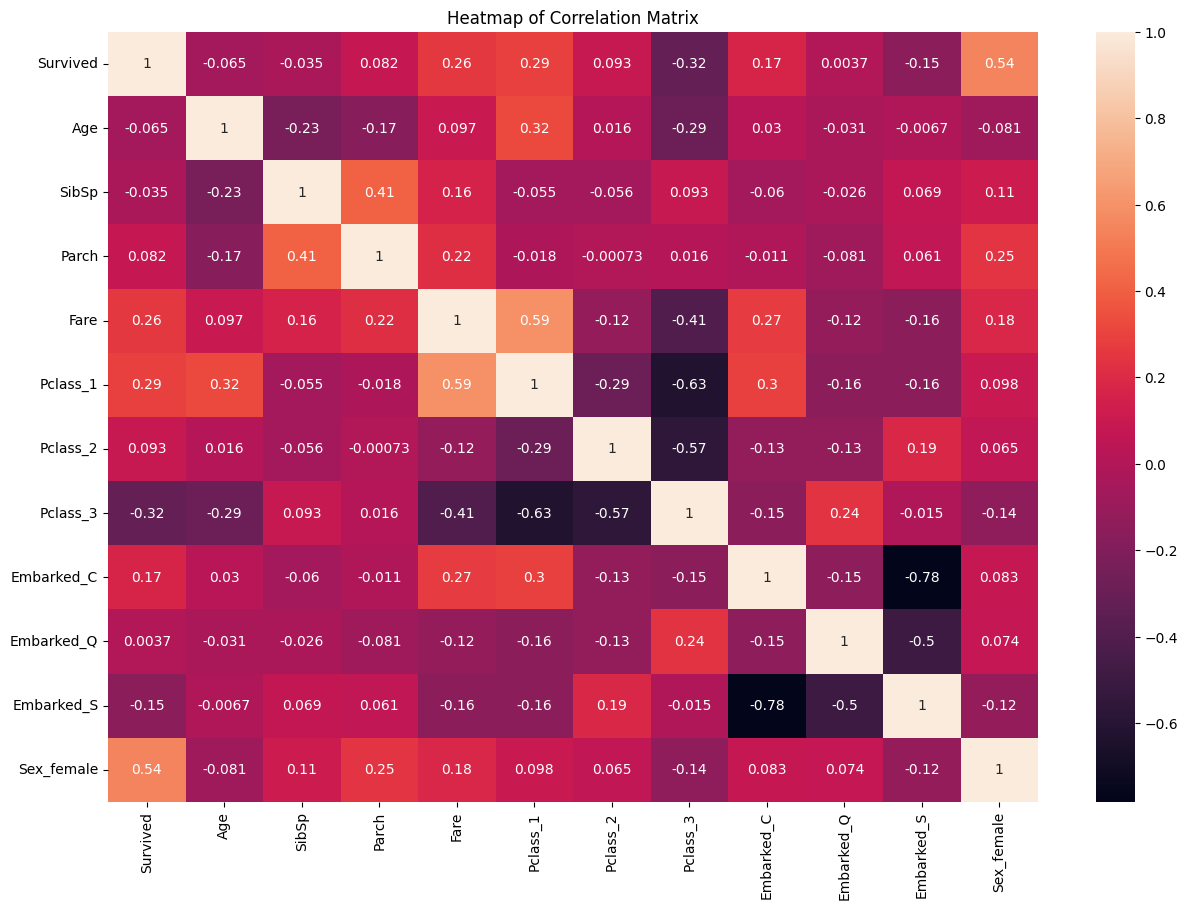

In [42]:
## pretty visualisations never hurt anyone
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, annot=True)
plt.title('Heatmap of Correlation Matrix')
## from here we can see that there are barely any correlations in between individual variables

In [32]:
x = newer_train.iloc[:, 1:]
y = newer_train['Survived']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [37]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\rakom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred = logreg.predict(x_test)

In [39]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7821229050279329


An accuracy score of 78.2% is nice, but we can still try to get an improved one using other evaluation methods. <br><br> Cue in K-fold cross validation.

In [46]:
k_fold_score = cross_val_score(logreg, x, y, cv=10, scoring='accuracy')

print('Accuracy using K fold: ', k_fold_score.mean())

Accuracy using K fold:  0.7991260923845193


C:\Users\rakom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rakom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

## What about other methods?

It is possible that Logistic Regression simply msy not be the best prediction method for this dataset. We can compare the accuracy score of this to other methods.

### Gaussian Naive Bayes

In [52]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
Y_pred = gaussian.predict(x_test)  
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

print('The accuracy score of Naive Bayes: ', acc_gaussian)

The accuracy score of Naive Bayes:  78.51


In [53]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train, y_train)  
Y_pred = knn.predict(x_test)  
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

print('Accuracy of K Nearest Neighbor: ', acc_knn)

Accuracy of K Nearest Neighbor:  84.41


In [54]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
Y_pred = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

print('Accuracy of Decision Tree: ', acc_decision_tree)

Accuracy of Decision Tree:  98.6


In [55]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)

print('Accuracy of SVC: ', acc_linear_svc)

Accuracy of SVC:  67.98


C:\Users\rakom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\rakom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
pd.DataFrame